# Import necessary packages and libraries

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

## 60000 images are present in training data
## 10000 images are present in test data

# Preprocessing

Image is of shape 28*28 in given dataset

We can make use of the ImageDataGenerator API provided by Tensorflow to perform multiple preprocessing steps on the input data, and prepare the data to be fed into the model in batches.

* Rescale image pixels to the range [0,1] instead of [0,255]
* Create validation split from training data
* Perform Data Augmentation such as Random rotation, brigtness, shear, zoom etc.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Loading in Batches

In [86]:
data_gen = ImageDataGenerator(rescale=1./255, 
                              zoom_range=0.2,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              brightness_range = (0.2,0.8),
                              validation_split = 0.2)

In [87]:
test_gen = ImageDataGenerator(rescale = 1./255)

Data Path

In [88]:
TRAIN_DATA_PATH = "../input/mnist-image/MNIST Dataset JPG format/MNIST - JPG - training"
TEST_DATA_PATH = "../input/mnist-image/MNIST Dataset JPG format/MNIST - JPG - testing"

Using 20% of training data for validation.

## Train Data Generator

In [89]:
train_generator = data_gen.flow_from_directory(TRAIN_DATA_PATH,
                                target_size = (28,28),
                                batch_size=128,
                                shuffle=True,
                                subset='training',
                                seed=42)



Found 48004 images belonging to 10 classes.


## Validation Data Generator

In [90]:
valid_generator = data_gen.flow_from_directory(TRAIN_DATA_PATH,
                                target_size = (28,28),
                                batch_size=128,
                                shuffle=True,
                                subset='validation',
                                seed=42)

Found 11996 images belonging to 10 classes.


## Test data generator

In [91]:
test_generator = test_gen.flow_from_directory(TEST_DATA_PATH,
                                             target_size = (28, 28),
                                             batch_size = 64,
                                             shuffle=True,
                                             seed = 42)

Found 10000 images belonging to 10 classes.


## Visualize data from DataGenerator

Access a batch of data from the Image Data Generator

In [92]:
data, labels = next(train_generator)

Visualize results of applied preprocessing and augmentation steps

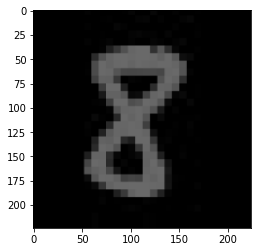

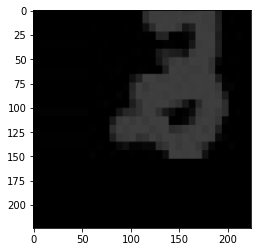

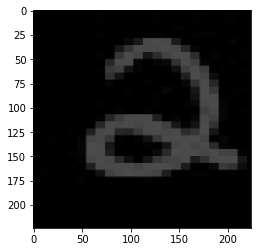

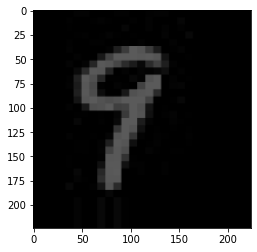

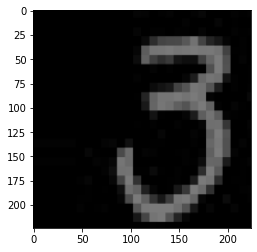

In [93]:
for img in data[:5,:,:,:]:
    plt.imshow(img, cmap='gray')
    plt.show()

As we can observe, the data has been preprocessed and augmented by performing various transformations such as random zoom, random brightness and rotation etc.